## Outlier detection.

In this task you will be given a dataset of credit card transactions, small proportion 
of which is identified as fraudulent (see *data description.txt*). Since there are too few frauds and too many regular transactions, standard classification methods are not directly appliccable. But since frauds are untypical you may use outlier detection methods to identify them.

In this task you need to identify the best outlier detection method with best parameters to detect frauds out of three outlier detection methods offered in sklearn. Quality metric is area-under-curve (AUC).

In [1]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

In [2]:
import sklearn
import sklearn as skl
import pandas as pd
from pdb import set_trace as bp

In [3]:
np.set_printoptions(linewidth=140,edgeitems=10)
rcParams['figure.figsize'] = (8.0, 5.0)

In [4]:
from common.classes.Struct import Struct
from common.visualize.colors import COLORS
from common.visualize.distributions import cont_dist_classification, pca_2D, cross_distributions
from common.visualize.distributions import cross_distributions_classification, cross_distributions_regression
from common.visualize.data import plot_corr

### Data preparation

In [5]:
Z=pd.read_csv('data.csv')

In [6]:
Z.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
Z.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
random.seed(0)
inds = random.permutation(arange(len(Z)))

Z=Z.loc[inds]

Z.index = arange(len(Z))

In [9]:
inds0 = find(Z['Class'].values==0)
inds1 = find(Z['Class'].values==1)

# for simplicity of computations consider subset of original sample.
inds0 = inds0[:len(inds0)//3]
inds1 = inds1[:len(inds1)//3]

inds = hstack( [inds0, inds1] ) 
random.seed(0)
inds = random.permutation(inds)

Z=Z.loc[inds] # to simplify future computations

In [10]:
len(Z)

94935

In [11]:
Z.Class.value_counts()

0    94771
1      164
Name: Class, dtype: int64

In [12]:
Z.index = arange(len(Z))

In [13]:
features = ['V%d'%i for i in arange(1,28+1)]

In [14]:
X = Z[features].values
Y = Z['Class'].values

In [15]:
len(X), len(Y)

(94935, 94935)

In [16]:
time=Z.Time.values

#### Plot distribution of the total number of transactions. Does it have any day/night pattern?

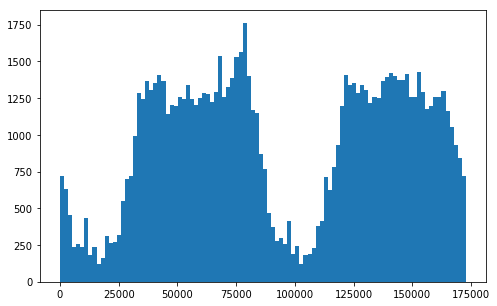

In [17]:
_ = hist(time, bins=100)

#### Plot distribution of the fraudulent number of transactions. Does it have any day/night pattern?

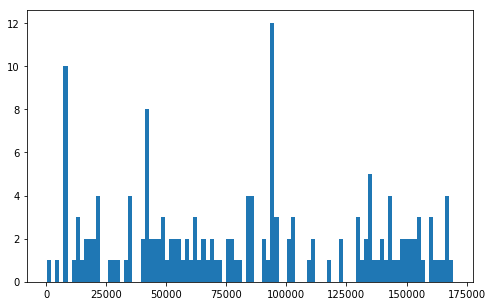

In [18]:
t2 = Z[Z['Class'] == 1].Time.values
_ = hist(t2, bins=100)

### Train, test sets

In [19]:
train_inds = find(time<86400) # train - previous day
test_inds = find(time>=86400) # test - next day

In [20]:
X_train = X[train_inds]
time_train = time[train_inds]
Y_train = Y[train_inds]

In [21]:
X_test = X[test_inds]
Y_test = Y[test_inds]
time_test = time[test_inds]

## Data visualizations

Should be performed on **train set only**

#### Estimate class proportions

In [22]:
Z.loc[train_inds]['Class'].value_counts()

0    48158
1       90
Name: Class, dtype: int64

#### Plot distributions $p(f|y=0), p(f|y=1)$ of all features f.

$p(f|y=0), p(f|y=1)$ should lie on one graph and different f should belong to different graphs.

Useful function: common.vizualize.distributions.cont_dist_classification

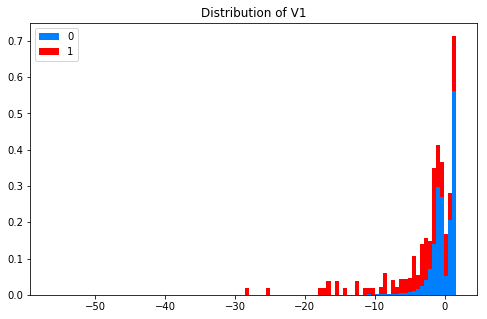

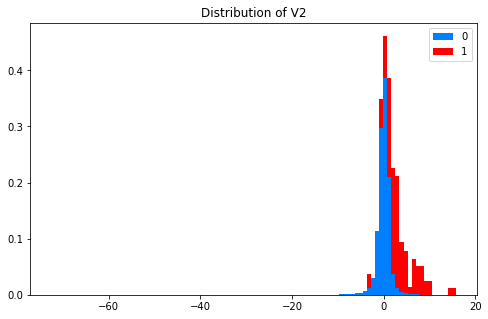

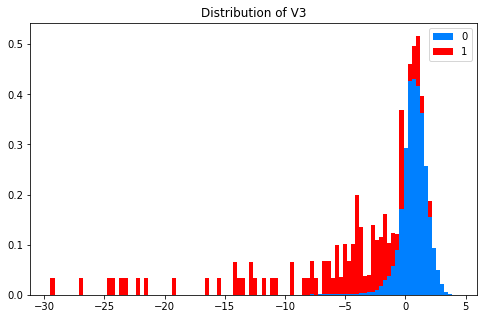

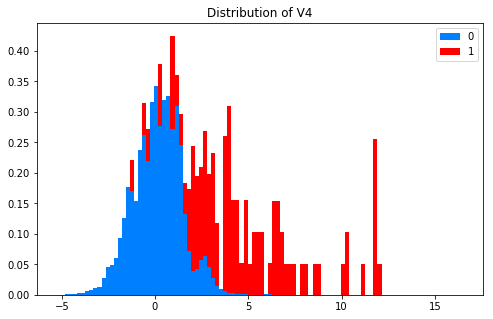

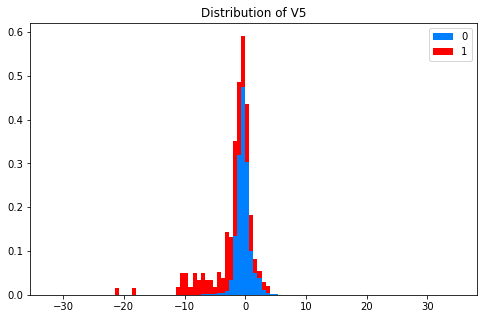

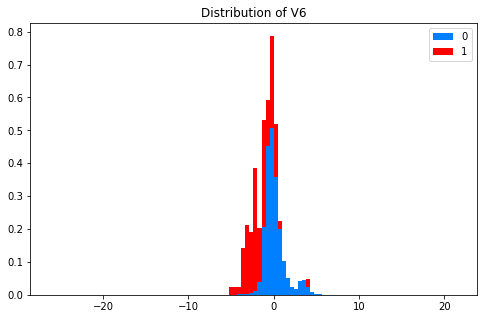

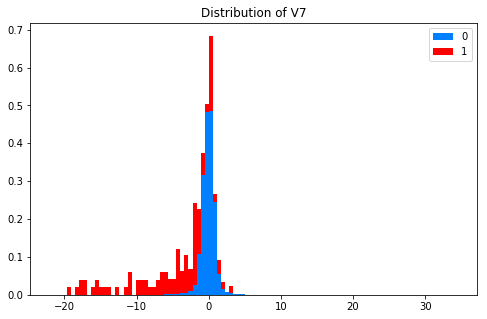

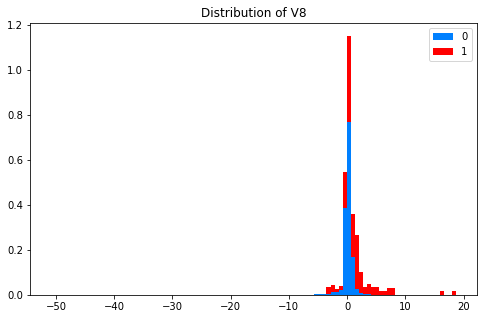

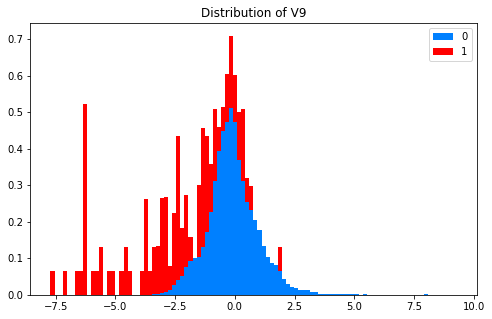

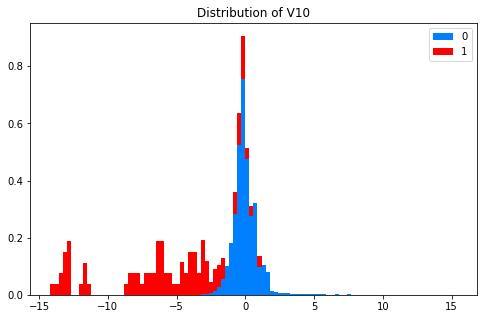

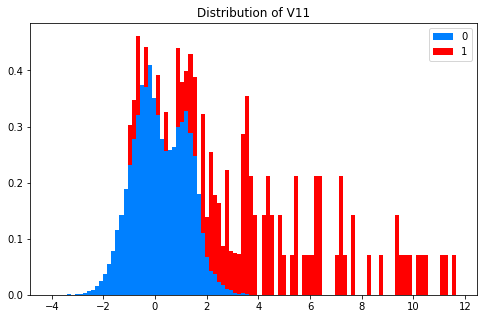

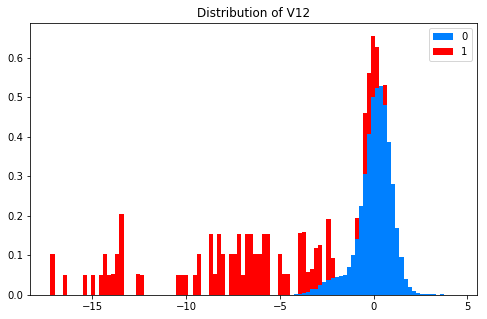

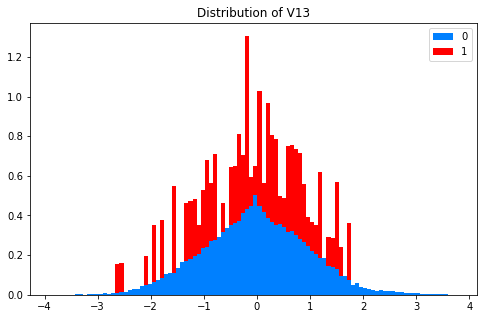

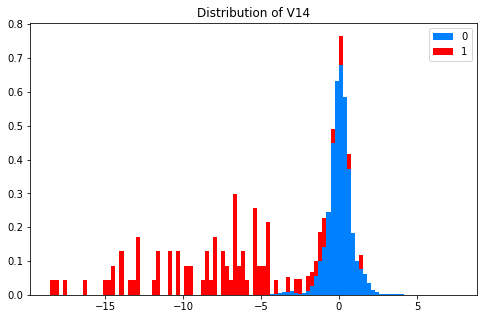

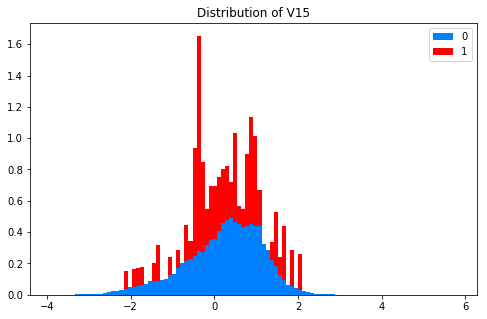

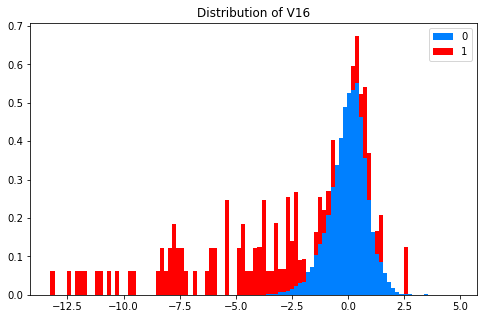

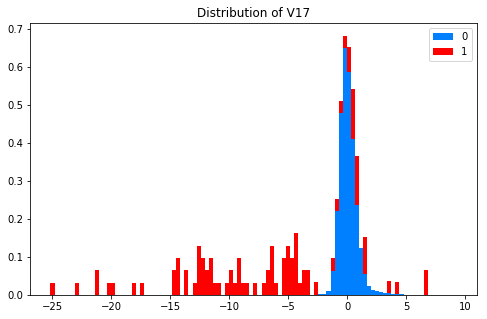

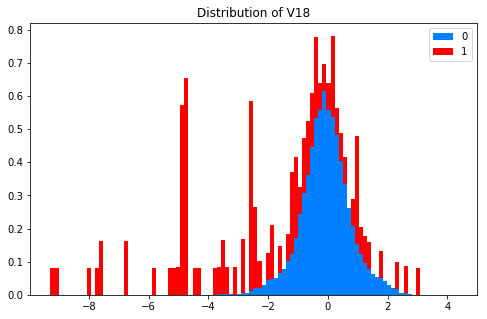

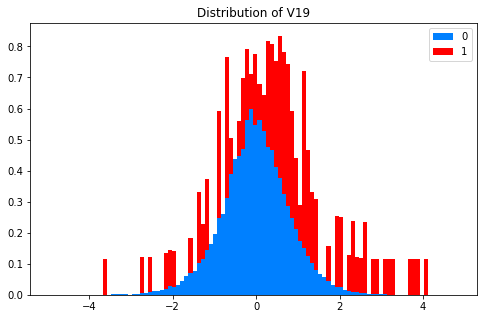

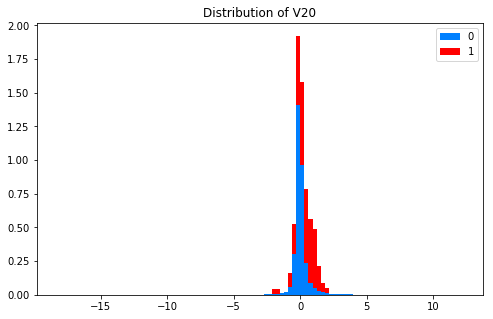

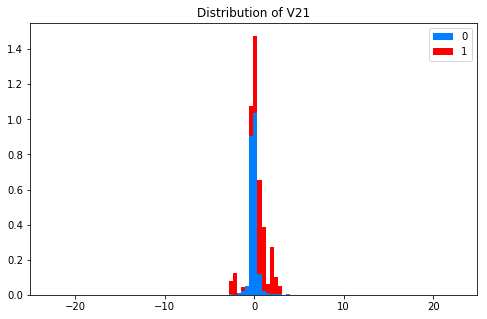

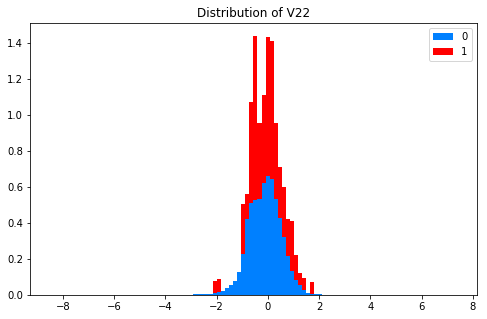

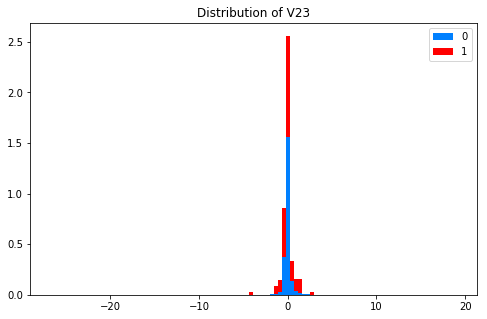

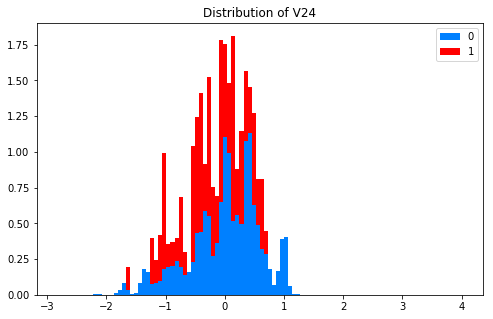

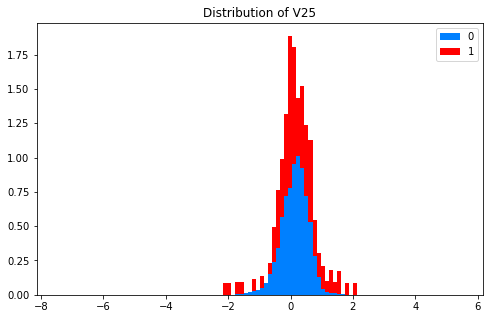

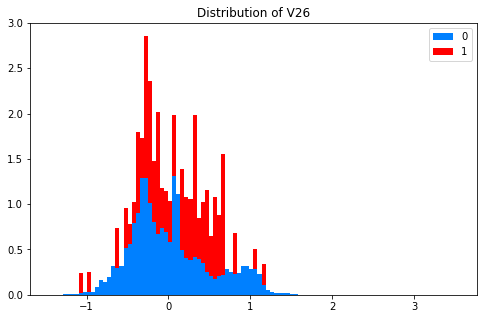

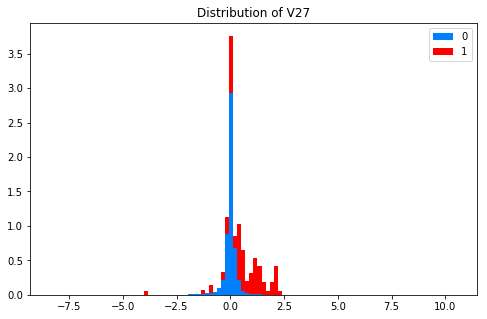

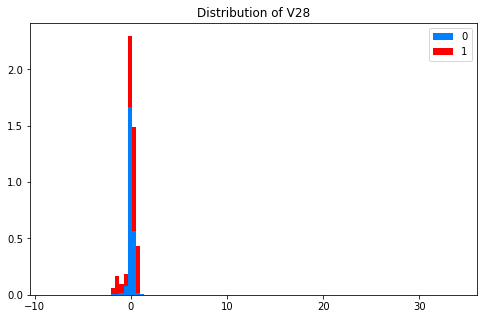

In [23]:
for i in range(0, 28):
    title = 'V' + str(i + 1)
    cont_dist_classification(X_train[:,i], Y_train, 
                             feature_name=title)
    plt.show()

#### Redraw the graph above for some very discriminative feature. Title it with feature name.

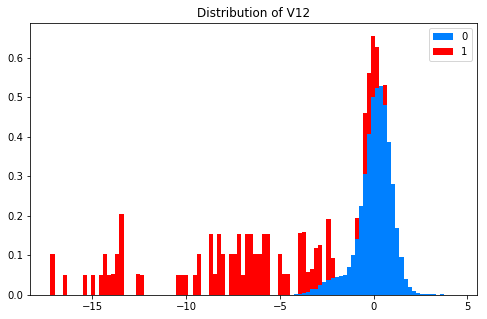

In [24]:
cont_dist_classification(X_train[:,11], Y_train, feature_name='V12')

#### Redraw the graph above for some least discriminative feature. Title it with feature name.

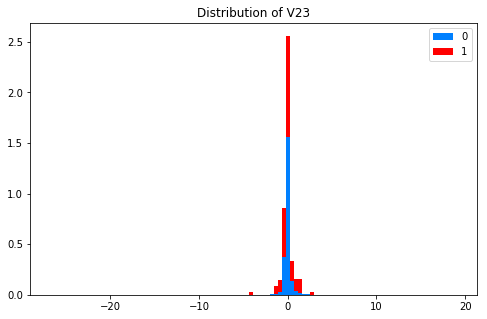

In [25]:
cont_dist_classification(X_train[:,22], Y_train, feature_name='V23')

### Plot data in first 2 principal component space
Useful function: common.visualize.cross_distributions.pca_2D
    
Are frauds separable?

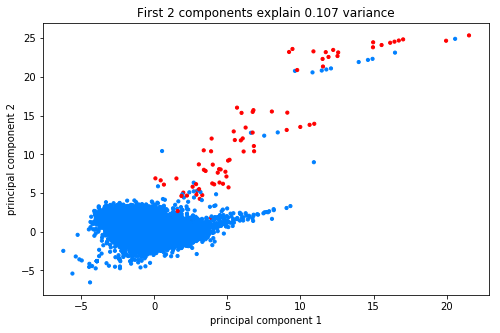

In [26]:
pca_2D(X_train, Y_train, task='classification')

#### Plot correlations between features.

Useful function: common.visualize.data.plot_corr

What regularities do you see? 

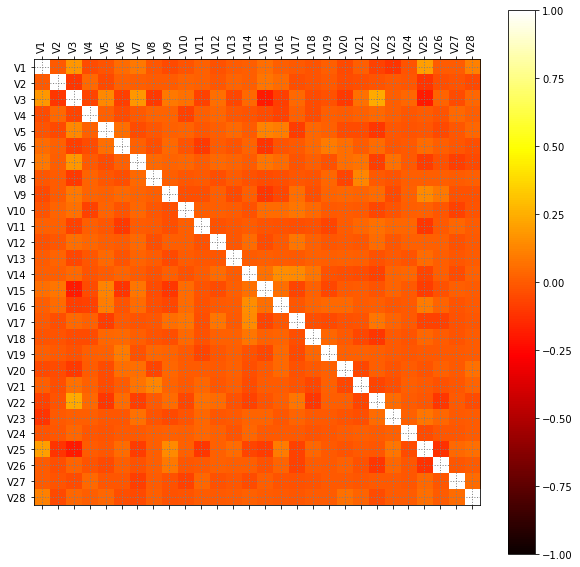

In [27]:
plot_corr(Z.drop(['Time', 'Amount', 'Class'], axis=1).loc[train_inds])

# Anomaly detection

Below you need to compare outlier detectin methods, using the following scheme:
    1. find optimal parameters with GridSearchCV with default number of folds on TRAIN SET
       Set n_jobs=1 (GridSearchCV may not work otherwise).
    2. display best parameters
    3. apply method with best parameters to TEST SET
    4. show ROC curve for TEST SET with title 'AUC=<value>', where <value> is estimated AUC value.

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EmpiricalCovariance
from sklearn.ensemble import IsolationForest

#### GridSearchCV should use everywhere scoring=my_auc_score defined below.

Y_hat is the **score**, showing how much an object looks like an outlier. So **predict** methods should **return scores, not classes.**

To obtain such predict method, you will need to redefine (by inheritance) original scikit-learn methods.

Don't confuse object outlier score with object normality score.

In [24]:
from sklearn.metrics import make_scorer

def my_auc(Y,Y_hat):
    fpr,tpr,_ = roc_curve(Y, Y_hat, pos_label=1)
    return auc(fpr, tpr)

my_auc_score = make_scorer(my_auc, greater_is_better=True)

In [25]:
def plot_roc(Y, Y_hat):
    fpr,tpr,_ = roc_curve(Y, Y_hat, pos_label=1)
    auc_val = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC=%0.4f' % auc_val)
    plt.legend(loc="lower right")
    plt.show()

### LocalOutlierFactor method

#### Show best parameters on train set.

Consider grid {'n_neighbors':[1,3,7],'p':[1,2]}

In [34]:
class ModifiedLOF(LocalOutlierFactor):
    def predict(self, X):
        return self._decision_function(X)

In [35]:
lof_model = ModifiedLOF()
params = {'n_neighbors':[1,3,7], 'p':[1,2]}

In [ ]:
gs_lof = GridSearchCV(lof_model, params, scoring=my_auc_score, n_jobs=1)
gs_lof.fit(X_train, Y_train)

In [ ]:
gs_lof.best_score_, gs_lof.best_params_

#### Show quality on test set.

In [ ]:
Y_hat = gs_lof.predict(X_test)
plot_roc(Y_test, Y_hat)

### EmpiricalCovariance method

#### Since method does not have tunable parametes, just show its ROC & AUC on test set.

In [26]:
class ModifiedEC(EmpiricalCovariance):
    def predict(self, X):
        return self.mahalanobis(X)

In [27]:
ec_model = ModifiedEC()
ec_model.fit(X_test, Y_train)

ModifiedEC(assume_centered=False, store_precision=True)

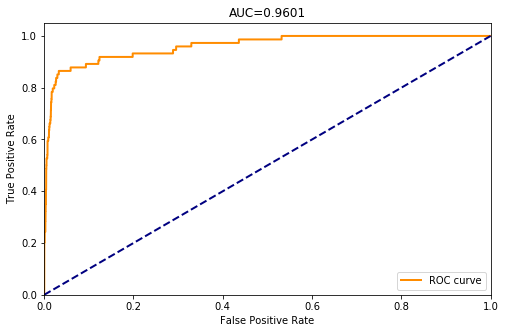

In [28]:
Y_hat = ec_model.predict(X_test)
plot_roc(Y_test, Y_hat)

### IsolationForest method

In [29]:
class ModifiedIE(IsolationForest):
    def predict(self, X):
        return - self.decision_function(X)

In [30]:
ie_model = ModifiedIE()

params = {
    'n_estimators':[10, 100, 250, 500],
    'contamination': [0.01, 0.05, 0.1, 0.2]
}


In [31]:
gs_ie = GridSearchCV(ie_model, params, scoring=my_auc_score, n_jobs=1)
gs_ie = gs_ie.fit(X_train, Y_train)

#### Show best parameters on train set

In [32]:
gs_ie.best_score_, gs_ie.best_params_

(0.935685, {'contamination': 0.100000, 'n_estimators': 500})

#### Show quality on test set.

Does the quality increase with increase of **n_estimators**?

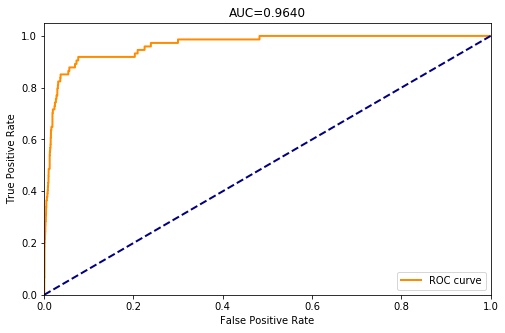

In [33]:
Y_hat = gs_ie.predict(X_test)
plot_roc(Y_test, Y_hat)